In [1]:
import pandas as pd

# Check if there are missing values

In [2]:
# chosse the file to analyze
file_path = "./downloaded_data/XRP_historical_data_1m.csv"

In [3]:
# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Convert the 'timestamp' column to pandas DateTime type
df["timestamp"] = pd.to_datetime(df["timestamp"])

# Sort the DataFrame by 'timestamp'
df = df.sort_values("timestamp")

# Calculate the time differences between consecutive timestamps
df["time_diff"] = df["timestamp"].diff()

# Filter out rows where the time difference is not equal to 1 minute
missing_intervals_df = df[df["time_diff"] != pd.Timedelta(minutes=1)]
missing_intervals_df

,timestamp,open,high,low,close,volume,symbol,time_diff
0,2020-09-01 00:00:00,0.28115,0.28139,0.28072,0.28131,212639.60,XRP/USDT,NaT
129960,2020-11-30 07:00:00,0.62588,0.62705,0.62533,0.62654,454736.50,XRP/USDT,0 days 01:01:00
160608,2020-12-21 18:00:00,0.52254,0.52393,0.51717,0.51985,974013.50,XRP/USDT,0 days 04:13:00
165408,2020-12-25 03:00:00,0.34891,0.34892,0.34124,0.34231,1385972.10,XRP/USDT,0 days 01:01:00
234569,2021-02-11 05:00:00,0.51164,0.51186,0.51026,0.51031,751892.50,XRP/USDT,0 days 01:20:00
267509,2021-03-06 03:30:00,0.45720,0.46680,0.45701,0.46676,2648050.70,XRP/USDT,0 days 01:31:00
332219,2021-04-20 04:30:00,1.24414,1.27979,1.24224,1.26446,2324990.40,XRP/USDT,0 days 02:31:00
339391,2021-04-25 08:45:00,1.04587,1.04777,1.03890,1.04590,632771.50,XRP/USDT,0 days 04:44:00
497386,2021-08-13 06:30:00,0.97830,0.99850,0.97810,0.99840,2063132.76,XRP/USDT,0 days 04:31:00
565096,2021-09-29 09:00:00,0.92490,0.92500,0.91800,0.91800,377686.00,XRP/USDT,0 days 02:01:00


# Calculate returns column

In [4]:
# 1m return
data = pd.read_csv(file_path)
data.drop_duplicates(inplace=True)

data["return"] = data["close"].pct_change()

new_file_path = "./downloaded_data/20_23_btc_historical_data_returns.csv"
data.to_csv(new_file_path, index=False)

# Finding maximum spikes/drawdowns

In [5]:
# Load the data from the CSV file again
file_path = "./downloaded_data/20_23_btc_historical_data_returns.csv"
df = pd.read_csv(file_path)

# Convert 'timestamp' column to datetime format
df["timestamp"] = pd.to_datetime(df["timestamp"])

# Show the first few rows of the DataFrame
df.head()

,timestamp,open,high,low,close,volume,symbol,return
0,2020-09-01 00:00:00,0.28115,0.28139,0.28072,0.28131,212639.6,XRP/USDT,NaN
1,2020-09-01 00:01:00,0.28129,0.28134,0.28099,0.28134,49387.5,XRP/USDT,0.000107
2,2020-09-01 00:02:00,0.28129,0.28129,0.28071,0.28072,118301.2,XRP/USDT,-0.002204
3,2020-09-01 00:03:00,0.28072,0.28090,0.28044,0.28048,179630.6,XRP/USDT,-0.000855
4,2020-09-01 00:04:00,0.28044,0.28044,0.28003,0.28034,334095.5,XRP/USDT,-0.000499


In [6]:
# Calculate the returns
df["return"] = df["close"].pct_change() * 100

# Filter out returns greater than +3% or less than -3%
extreme_returns_df = df[(df["return"] > 3) | (df["return"] < -3)]

# Display sample rows with returns greater than +3% or less than -3%
extreme_returns_df.sample(3)
print(len(extreme_returns_df.index))

246


# Plot Spikes/Drawdowns

In [7]:
start_time = "2021-05-01 00:00:00"
end_time = "2021-05-15 00:00:00"

# Convert these to datetime
start_time = pd.to_datetime(start_time)
end_time = pd.to_datetime(end_time)

# Filter the DataFrame
filtered_df = df[(df["timestamp"] >= start_time) & (df["timestamp"] <= end_time)]
filtered_extreme_returns = extreme_returns_df[
    (extreme_returns_df["timestamp"] >= start_time)
    & (extreme_returns_df["timestamp"] <= end_time)
]

print(filtered_df.head(3))
print(filtered_extreme_returns.head(3))

                 timestamp    open    high     low   close      volume  \
347506 2021-05-01 00:00:00  1.5989  1.5998  1.5916  1.5945  1201249.10   
347507 2021-05-01 00:01:00  1.5946  1.6000  1.5935  1.6000  1012537.16   
347508 2021-05-01 00:02:00  1.6000  1.6164  1.5999  1.6160  3211807.00   

          symbol    return  
347506  XRP/USDT -0.268952  
347507  XRP/USDT  0.344936  
347508  XRP/USDT  1.000000  
                 timestamp    open    high     low   close       volume  \
351877 2021-05-04 00:51:00  1.4873  1.4879  1.4369  1.4371   9717937.32   
351882 2021-05-04 00:56:00  1.4632  1.4640  1.4010  1.4010   9252484.79   
355820 2021-05-06 18:34:00  1.6295  1.6299  1.5271  1.5271  20533389.55   

          symbol    return  
351877  XRP/USDT -3.362249  
351882  XRP/USDT -4.224774  
355820  XRP/USDT -6.232347  


C:\Users\Denis\AppData\Local\Temp\ipykernel_3968\4099971386.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['timestamp'] = pd.to_datetime(filtered_df['timestamp'])


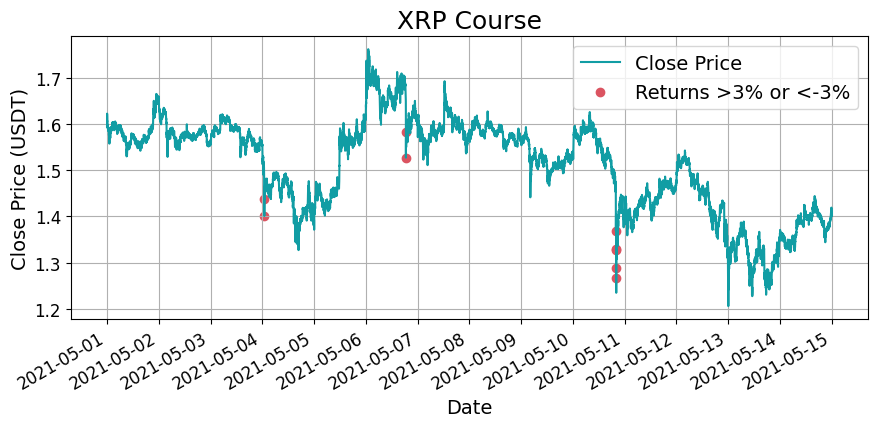

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


plt.rcParams["font.size"] = 14
plt.rcParams["axes.titlesize"] = 18
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.figure(figsize=(9, 4.5))


# Convert 'timestamp' to datetime if it's not already
filtered_df["timestamp"] = pd.to_datetime(filtered_df["timestamp"])

# Plotting
# plt.figure(figsize=(14, 7))

# Plot close prices using 'timestamp' as x-axis
plt.plot(
    filtered_df["timestamp"], filtered_df["close"], label="Close Price", color="#119DA4"
)

# Assuming you have a similar conversion for 'filtered_extreme_returns'
# Plot extreme returns
plt.scatter(
    filtered_extreme_returns["timestamp"],
    filtered_extreme_returns["close"],
    color="#DB5461",  # You can adjust the color based on the condition as before
    label="Returns >3% or <-3%",
)

# Add title and labels
plt.title("XRP Course")
plt.xlabel("Date")
plt.ylabel("Close Price (USDT)")

# Format x-axis to show only day and month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.gca().xaxis.set_major_locator(
    mdates.DayLocator(interval=1)
)  # Adjust interval as needed
plt.gcf().autofmt_xdate()  # Auto format the dates to avoid overlap

# Add legend and grid
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("./xrp_course.png")
plt.show()

# Plot Distribution of Events

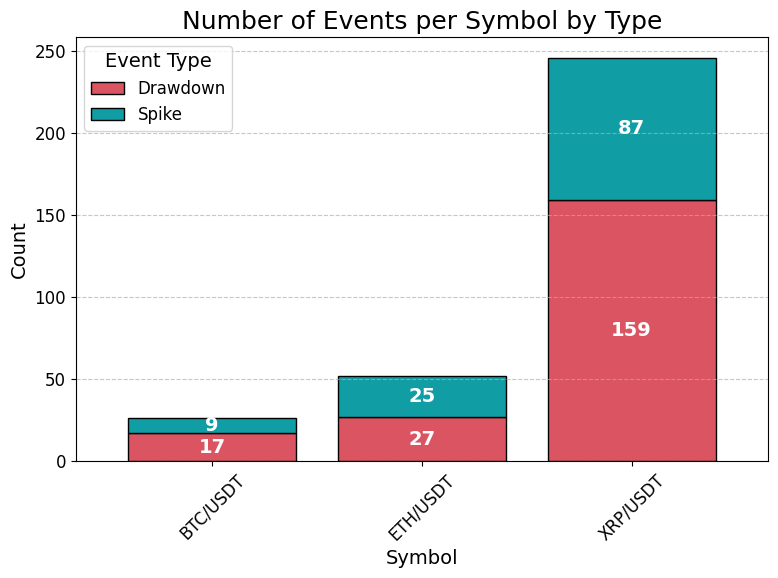

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the data
data = pd.read_csv("../data/natural_sd/natural_spikes_drawdowns.csv")

# Count events by type
type_counts = data.groupby("symbol")["Type"].value_counts().unstack().fillna(0)

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Use a distinct color palette
colors = ["#DB5461", "#119DA4"]

# Plot the data
type_counts.plot(
    kind="bar", stacked=True, ax=ax, color=colors, edgecolor="black", width=0.8
)

# Set the title, labels, and other aesthetics
ax.set_title("Number of Events per Symbol by Type", fontsize=18)
ax.set_xlabel("Symbol", fontsize=14)
ax.set_ylabel("Count", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
ax.grid(axis="y", linestyle="--", alpha=0.7)
ax.legend(title="Event Type", fontsize=12, title_fontsize=14)

# Annotate the counts on the bar stacks with larger font size
for idx, rect in enumerate(ax.patches):
    y_value = rect.get_y() + rect.get_height() / 2
    count = int(rect.get_height())
    ax.text(
        rect.get_x() + rect.get_width() / 2,
        y_value,
        str(count),
        ha="center",
        va="center",
        fontsize=14,
        color="white",
        weight="bold",
    )

plt.tight_layout()
plt.savefig("./events_per_symbol.png")
plt.show()